# Data Science Blog Post

This project (Write a Data Science Blog Post) is part of Udacity Data Scientists (Nanodegree Program).

## What is MySQL the most popular database management software in Indonesia?
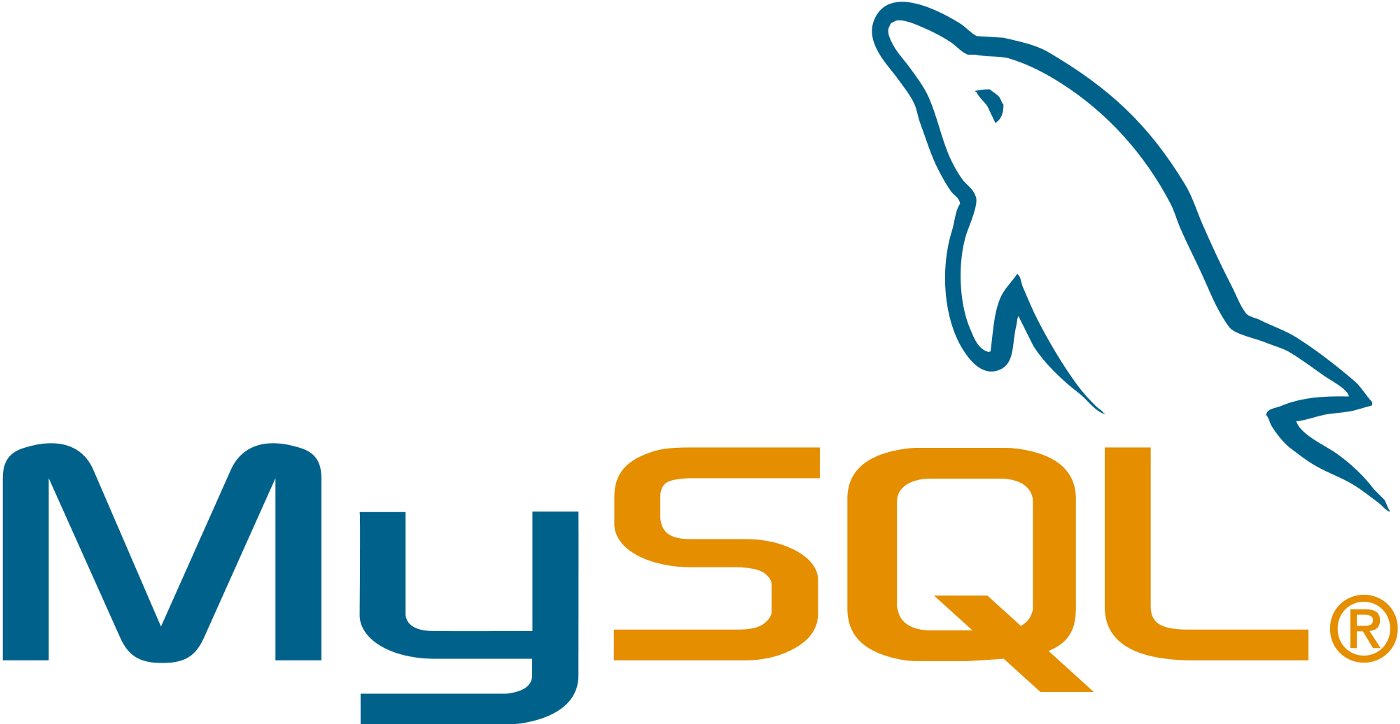

Development of technology is something that can not be avoided, where the background of technological revolution in 21st century is due to the demands of competition in era of globalization.

Technological revolution is growing rapidly, thus demanding that humans produce new findings.

The purpose of these technological developments is to make it easier for humans to carry out their activities. With the development of technology in the world, Indonesia is also a country that strongly supports the development of these technologies.

One of this development is the use of database management software to facilitate data processing. In this article, we will compare the level of use of the database management software between MySQL and another database management software.

Motivation behind this project includes answer to following questions:

1. “What is database management software often used to work between MySQL and PostgreSQL in Indonesia?”
2. “How is percentage the comparison between MySQL and PostgreSQL as a database management software?”
3. “What is MySQL the most widely used database management software in Indonesia?”

This states data analysis using Stackoverflow’s 2017, 2018, 2019, 2020, and 2021 Annual Developer Survey.
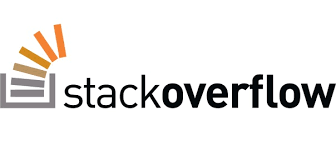

In [1]:
# to handle dataset
import pandas as pd
import numpy as np
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# to ignore warning
import warnings

In [2]:
# Reading dataset from Stackoverflow survey data

df_2021 = pd.read_csv('survey_results_public_2021.csv')
df_2020 = pd.read_csv('survey_results_public_2020.csv')
df_2019 = pd.read_csv('survey_results_public_2019.csv')
df_2018 = pd.read_csv('survey_results_public_2018.csv')
df_2017 = pd.read_csv('survey_results_public_2017.csv')

C:\Users\Ahmad Gilang A\AppData\Local\Temp\ipykernel_6200\2071964316.py:6: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv('survey_results_public_2018.csv')


In [3]:
# sample data 2021
df_2021.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

## 1. What database management software is often used to work between MySQL and PostgreSQL in Indonesia

In [4]:
# Filter a dataframe by country and returns filtered dataframe

def filter_country(data, col_filter, country, columns):
    
    df = data    
    for column in columns: 
        df = df[df[col_filter] == country].dropna(subset=[column])
        
    return df

# Filter the dataframe by Indonesia and selecting some columns.
df_21 = filter_country(df_2021, 'Country', 'Indonesia', ['DatabaseHaveWorkedWith'])
df_20 = filter_country(df_2020, 'Country', 'Indonesia', ['DatabaseWorkedWith'])
df_19 = filter_country(df_2019, 'Country', 'Indonesia', ['DatabaseWorkedWith'])
df_18 = filter_country(df_2018, 'Country', 'Indonesia', ['DatabaseWorkedWith'])
df_17 = filter_country(df_2017, 'Country', 'Indonesia', ['HaveWorkedDatabase'])

In [5]:
#Split column by (;) and returns a splited series

def split_column(data, column):
    
    df = data
    col_series = df[column].apply(lambda x: x.split(';'))
    
    return col_series

# Splitting the Data Frame by column into a Series. 
data_21 = split_column(df_21, 'DatabaseHaveWorkedWith')
data_20 = split_column(df_20, 'DatabaseWorkedWith')
data_19 = split_column(df_19, 'DatabaseWorkedWith')
data_18 = split_column(df_18, 'DatabaseWorkedWith')
data_17 = split_column(df_17, 'HaveWorkedDatabase')

In [6]:
# Flat a nested list and returns a flat list

def disarray(array_list):
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_2021 = disarray(data_21)
list_2020 = disarray(data_20)
list_2019 = disarray(data_19)
list_2018 = disarray(data_18)
list_2017 = disarray(data_17)

In [7]:
# Group by count to a list and returns a result dict

def group_list(data_list, year):
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Database Platform':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_2021 = group_list(list_2021, '2021')
dict_2020 = group_list(list_2020, '2020')
dict_2019 = group_list(list_2019, '2019')
dict_2018 = group_list(list_2018, '2018')
dict_2017 = group_list(list_2017, '2017')

In [8]:
# Choose data MySQL and PostgreSQL 

PGSQL_21 = dict_2021[5]
MYSQL_21 = dict_2021[3]

PGSQL_20 = dict_2020[0]
MYSQL_20 = dict_2020[1]

PGSQL_19 = dict_2019[11]
MYSQL_19 = dict_2019[1]

PGSQL_18 = dict_2018[3]
MYSQL_18 = dict_2018[2]

PGSQL_17 = dict_2017[2]
MYSQL_17 = dict_2017[1]

In [9]:
# Create a dataframe

df_PGSQL_21 = pd.DataFrame((PGSQL_21), index=[0])
df_MYSQL_21 = pd.DataFrame((MYSQL_21), index=[0])

df_PGSQL_20 = pd.DataFrame((PGSQL_20), index=[0])
df_MYSQL_20 = pd.DataFrame((MYSQL_20), index=[0])

df_PGSQL_19 = pd.DataFrame((PGSQL_19), index=[0])
df_MYSQL_19 = pd.DataFrame((MYSQL_19), index=[0])

df_PGSQL_18 = pd.DataFrame((PGSQL_18), index=[0])
df_MYSQL_18 = pd.DataFrame((MYSQL_18), index=[0])

df_PGSQL_17 = pd.DataFrame((PGSQL_17), index=[0])
df_MYSQL_17 = pd.DataFrame((MYSQL_17), index=[0])

DataFrame = [df_PGSQL_21, df_MYSQL_21, df_PGSQL_20, df_MYSQL_20, df_PGSQL_19, df_MYSQL_19, df_PGSQL_18, df_MYSQL_18, df_PGSQL_17, df_MYSQL_17] 
result = pd.concat(DataFrame).drop_duplicates().reset_index(drop=True)
result

,Database Platform,Count,Year
0,PostgreSQL,250,2021
1,MySQL,411,2021
2,PostgreSQL,155,2020
3,MySQL,300,2020
4,PostgreSQL,166,2019
5,MySQL,363,2019
6,PostgreSQL,136,2018
7,MySQL,349,2018
8,PostgreSQL,44,2017
9,MySQL,124,2017


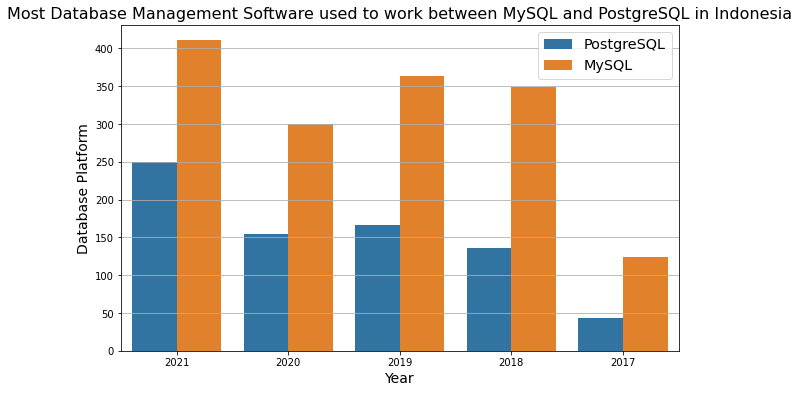

In [10]:
# Create Figure.1 MySQL and PostgreSQL

plt.figure(figsize=(10,6))
sb.barplot(x = 'Year',
            y = 'Count',
            hue = 'Database Platform',
            data = result)

plt.xlabel("Year", fontsize = 14)
plt.ylabel("Database Platform", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most Database Management Software used to work between MySQL and PostgreSQL in Indonesia', size = 16)
plt.grid(axis='y')
plt.show()

From the chart, we can say that the MySQL database management software is more widely used than PostgreSQL from 2017 to 2021.

In Indonesia, the most use of the MySQL database management software is in 2021, which is used by more than 400 users, while in the same year PostgreSQL is only used by 250 users.

## 2. How percentage is the comparasion between MySQL and PostgreSQL as a database management software

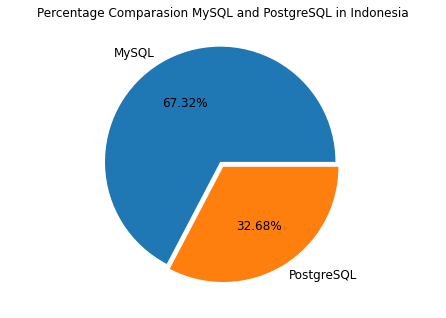

In [11]:
# Grouping dataframe
df = result.groupby(['Database Platform']).sum()

# Create a list from dataframe
Database_Platform = ('MySQL','PostgreSQL')
Amount = (1547, 751)

# Create Figure.1 MySQL and PostgreSQL
fig = plt.figure()
expl = [0.05,0]
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.set_title('Percentage Comparasion MySQL and PostgreSQL in Indonesia')
ax.pie(Amount, labels = Database_Platform, autopct='%1.2f%%', explode = expl, textprops ={'fontsize' : 12})
plt.show()

Based on the pie chart above, the percentage comparison between MySQL and PostgreSQL is 67% compared to 33%.

The percentage of results from using the database management software in Indonesia from 2017 to 2021 shows that MySQL has a much larger percentage compared to PostgreSQL.

## 3. What is MySQL the most widely used database manajement software in Indonesia

In [12]:
# Create a dataframe

df_2021 = pd.DataFrame(dict_2021)
df_2020 = pd.DataFrame(dict_2020)
df_2019 = pd.DataFrame(dict_2019)
df_2018 = pd.DataFrame(dict_2018)
df_2017 = pd.DataFrame(dict_2017)

DataFrame = [df_2021, df_2020, df_2019, df_2018, df_2017] 
df_new = pd.concat(DataFrame).drop_duplicates().reset_index(drop=True)

# Take data greater than 100
df_new = df_new.loc[(df_new['Count'] > 100)]

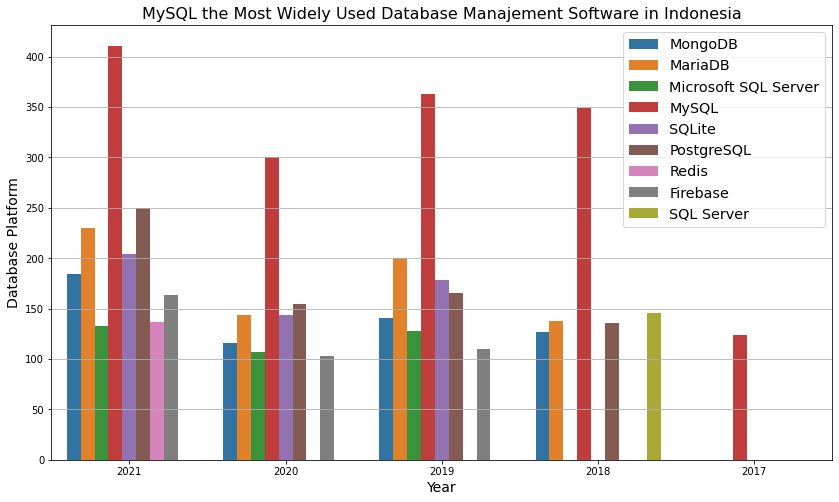

In [13]:
plt.figure(figsize=(14,8))
sb.barplot(x = 'Year',
            y = 'Count',
            hue = 'Database Platform',
            data = df_new)

plt.xlabel("Year", fontsize = 14)
plt.ylabel("Database Platform", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='2', loc = 'upper right')
plt.title('MySQL the Most Widely Used Database Manajement Software in Indonesia', size = 16)
plt.grid(axis='y')
plt.show()

Based on the chart, MySQL has always been number one over other database management software from 2017 to 2021.

The lowest MySQL usage was in 2017 which was only around 124 users and the most in 2021, around 441 users.

So based on the survey data, MySQL is the most widely used database management platform in Indonesia.

From all of this figure we can have a insight. Database management software MySQL has a big potensial to grow every year, majority programer in Indonesia used MySQL to work.

## Conclusion

In this article, we can see that the most database management software used to work in Indonesia, according to Stackoverflow 2017–2021 Annual Developer Survey Data.

1. Database management software MySQL is more widely used than PostgreSQL in Indonesia.

2. The percentage MySQL greater than PostgreSQL, which is 67% compared to 33%.

3. MySQL is the most database management software that used to work than others in Indonesia.

## References

Stackoverflow Developer Survey Data: https://insights.stackoverflow.com/survey

Medium : https://medium.com/@ahmadgilanga/data-science-blog-post-986c4470676f
